# Datos Abiertos SECOP, Gobernación Del cesar
## Por:
- Sebastian Vélez Jaramillo
- Santiago Ruiz Ramirez
- Edison Camilo Garatejo Vargas
- Sebastian López Valencia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

## Calidad Datos

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets/AprendizajeAutomatico/Proyecto/cesarsecop1.csv")

In [ ]:
!pip install dataprep

     |████████████████████████████████| 1.8 MB 31.0 MB/s 
     |████████████████████████████████| 719 kB 48.6 MB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
     |████████████████████████████████| 366 kB 56.8 MB/s 
     |████████████████████████████████| 1.5 MB 27.3 MB/s 
     |████████████████████████████████| 1.3 MB 37.4 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 10.1 MB 33.3 MB/s 
     |████████████████████████████████| 848 kB 45.3 MB/s 
     |████████████████████████████████| 142 kB 49.3 MB/s 
     |████████████████████████████████| 294 kB 60.2 MB/s 
     |████████████████████████████████| 119 kB 61.3 MB/s 
     |████████████████████████████████| 49 kB 7.2 MB/s 
     |████████████████████████████████| 743 kB 35.7 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=080701fede1c83f6a866ee7e1d869999117cca437c1badd44fa767c94f8ccac7
  Stored in directory: /root/.cache/pip

In [ ]:
from dataprep.eda import plot

NumExpr defaulting to 2 threads.



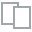
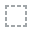
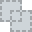
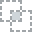
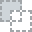
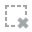
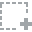
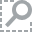
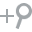
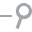
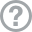
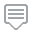
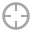
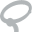
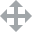
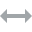
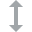
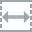
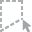
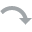
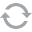
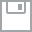
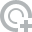
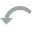
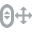
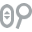
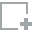
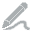
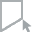
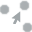
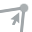
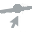

In [ ]:
plot(data)

In [ ]:
# Sebas lo: /content/drive/MyDrive/datasets/AprendizajeAutomatico/Proyecto/cesarsecop1.csv
# Camilo: /content/drive/MyDrive/VISOR_-_P004_-_Gobernacion_Cesar_-_SECOP_I.csv
datos=pd.read_csv("/content/drive/MyDrive/datasets/AprendizajeAutomatico/Proyecto/cesarsecop1.csv")

In [ ]:
datos.head()

,UID,Anno Cargue SECOP,Anno Firma del Contrato,Nivel Entidad,Orden Entidad,Nombre de la Entidad,NIT de la Entidad,Código de la Entidad,ID Tipo de Proceso,Tipo de Proceso,Estado del Proceso,Causal de Otras Formas de Contratacion Directa,ID Regimen de Contratacion,Regimen de Contratacion,ID Objeto a Contratar,Objeto a Contratar,Detalle del Objeto a Contratar,Tipo de Contrato,Municipio Obtencion,Municipio Entrega,Municipios Ejecucion,Fecha de Cargue en el SECOP,Numero de Constancia,Numero de Proceso,Numero del Contrato,Cuantia Proceso,ID Grupo,Nombre Grupo,ID Familia,Nombre Familia,ID Clase,Nombre Clase,ID Ajudicacion,Tipo Identifi del Contratista,Identificacion del Contratista,Nom Raz Social Contratista,Dpto y Muni Contratista,Tipo Doc Representante Legal,Identific del Represen Legal,Nombre del Represen Legal,Fecha de Firma del Contrato,Fecha Ini Ejec Contrato,Plazo de Ejec del Contrato,Rango de Ejec del Contrato,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Fecha Fin Ejec Contrato,Compromiso Presupuestal,Cuantia Contrato,Valor Total de Adiciones,Valor Contrato con Adiciones,Objeto del Contrato a la Firma,ID Origen de los Recursos,Origen de los Recursos,Codigo BPIN,Proponentes Seleccionados,Calificacion Definitiva,ID Sub Unidad Ejecutora,Nombre Sub Unidad Ejecutora,Ruta Proceso en SECOP I,Moneda,EsPostConflicto,Marcacion Adiciones,Posicion Rubro,Nombre Rubro,Valor Rubro,Sexo RepLegal Entidad,Pilar Acuerdo Paz,Punto Acuerdo Paz,Municipio Entidad,Departamento Entidad,Ultima Actualizacion,Fecha Liquidacion
0,12-13-899555864051,2012,2012.0,TERRITORIAL,TERRITORIAL DEPARTAMENTAL CENTRALIZADO,CESAR GOBERNACIÓN,892399999,220000001,13,Contratación Mínima Cuantía,Celebrado,No Definido,13,Contratación Mínima Cuantía,90000000,"Servicios de Viajes, Alimentación, Alojamiento...",SUMINISTRO DE ALIMENTACION PARA EL ESQUEMA DE ...,Suministro,Valledupar,Valledupar,"Valledupar, Cesar",2012-04-20,12-13-899555,SEMCSGOB00022012,2012 02 0261,44780000.0,N,No Definido,N/D,No Definido,N/D,No Definido,864051,Nit de Persona Jurídica,8240068335,FUNDACION DIANA MRCELA DIMAR,Cesar,Cédula de Ciudadanía,824006833,DIANA MARCELA,2012-04-25,2012-04-25,5,D,0,0,2012-04-30 00:00:00,Sn Definir,44502000.0,0.0,44502000.0,SUMINISTRO DE ALIMENTACION PARA EL ESQUEMA DE ...,0,No Definido,No Definido,No Definido,No Definido,0,No Definido,https://www.contratos.gov.co/consultas/detalle...,No Definido,No,0,No Definido,No Definido,0,N,No Definido,No Definido,Valledupar,Cesar,2012-04-25,NaN
1,13-12-18233051709318,2013,2013.0,TERRITORIAL,TERRITORIAL DEPARTAMENTAL CENTRALIZADO,CESAR GOBERNACIÓN,892399999,220000001,12,Contratación Directa (Ley 1150 de 2007),Celebrado,Prestación de Servicios Profesionales y de Apo...,12,Contratación Directa (Ley 1150 de 2007),80000000,"Servicios de Gestion, Servicios Profesionales ...",PRESTACIÓN DE SERVICIOS PARA LA PUBLICACIÓN EN...,Prestación de Servicios,No Definido,No Definido,"Valledupar, Cesar",2013-07-24,13-12-1823305,CD2013020818,2013 02 0818,4000000.0,N,No Definido,N/D,No Definido,N/D,No Definido,1709318,Cédula de Ciudadanía,12722620,BEDER GUERRA GUTIERREZ,Cesar,Cédula de Ciudadanía,12722620,BEDER GUERRA GUTIERREZ,2013-07-12,2013-07-15,5,M,0,0,2013-12-15 00:00:00,Sn Definir,4000000.0,0.0,4000000.0,PRESTACIÓN DE SERVICIOS PARA LA PUBLICACIÓN EN...,0,No Definido,No Definido,No Definido,No Definido,0,No Definido,https://www.contratos.gov.co/consultas/detalle...,No Definido,No,0,No Definido,No Definido,0,N,No Definido,No Definido,Valledupar,Cesar,2013-07-24,NaN
2,13-13-18995701810391,2013,2013.0,TERRITORIAL,TERRITORIAL DEPARTAMENTAL CENTRALIZADO,CESAR GOBERNACIÓN,892399999,220000001,13,Contratación Mínima Cuantía,Celebrado,No Definido,13,Contratación Mínima Cuantía,84000000,Servicios Financieros y de Seguros,ADQUISICION DE POLIZA CONTRA TODO RIESGO DEL V...,Prestación de Servicios,Valledupar,Valledupar,"Valledupar, Cesar",2013-08-28,13-13-1899570,SMCSGR00422013,2013 02 0918,7700882.0,N,No Definido,N/D,No Definido,N/D,No Definido,1810391,Ni

In [ ]:
datos.dtypes

UID                         object
Anno Cargue SECOP            int64
Anno Firma del Contrato    float64
Nivel Entidad               object
Orden Entidad               object
                            ...   
Punto Acuerdo Paz           object
Municipio Entidad           object
Departamento Entidad        object
Ultima Actualizacion        object
Fecha Liquidacion           object
Length: 73, dtype: object

In [ ]:
datos.shape

(6795, 73)

In [ ]:
datos.isnull().sum().sum()

10623

In [ ]:
df=datos.drop(['Departamento Entidad','Municipio Entidad','Pilar Acuerdo Paz','Punto Acuerdo Paz','Valor Rubro','Nombre Rubro'
,'Posicion Rubro','Marcacion Adiciones','ID Sub Unidad Ejecutora','Nombre Sub Unidad Ejecutora','Compromiso Presupuestal',
'Nombre Grupo','ID Grupo','Código de la Entidad','NIT de la Entidad','Nombre de la Entidad','Orden Entidad','Nivel Entidad'],axis=1)

In [ ]:
df.isnull().sum()

UID                                                  0
Anno Cargue SECOP                                    0
Anno Firma del Contrato                           1115
ID Tipo de Proceso                                   0
Tipo de Proceso                                      0
Estado del Proceso                                   0
Causal de Otras Formas de Contratacion Directa       0
ID Regimen de Contratacion                           0
Regimen de Contratacion                              0
ID Objeto a Contratar                                0
Objeto a Contratar                                   0
Detalle del Objeto a Contratar                       0
Tipo de Contrato                                     0
Municipio Obtencion                                  0
Municipio Entrega                                    0
Municipios Ejecucion                                 1
Fecha de Cargue en el SECOP                          0
Numero de Constancia                                 0
Numero de 

In [ ]:
df2=df.drop(["UID",'Fecha Liquidacion','Fecha Fin Ejec Contrato','Fecha Ini Ejec Contrato','Fecha de Firma del Contrato','Anno Firma del Contrato'],axis=1)

In [ ]:
df2.drop(["Numero del Contrato", "ID Tipo de Proceso","ID Regimen de Contratacion",\
          "ID Objeto a Contratar", "Detalle del Objeto a Contratar", "Municipio Obtencion", \
          "Municipio Entrega", "Municipios Ejecucion", "Fecha de Cargue en el SECOP", "Numero de Constancia",\
          "Numero de Proceso", "ID Familia", "ID Clase", "ID Ajudicacion", "Identificacion del Contratista", \
          "Nom Raz Social Contratista", "Identific del Represen Legal", "Nombre del Represen Legal", "Tiempo Adiciones en Meses", \
          "Objeto del Contrato a la Firma", "ID Origen de los Recursos", "Origen de los Recursos", "Codigo BPIN", \
          "Proponentes Seleccionados", "Calificacion Definitiva", "Ruta Proceso en SECOP I", "Moneda", "EsPostConflicto", \
          "Sexo RepLegal Entidad", "Ultima Actualizacion", "Anno Cargue SECOP"], axis=1, inplace=True)

In [ ]:
df2.shape

(6795, 18)

In [ ]:
def convertir_object_categorico(df):
  tipos = df.dtypes
  columnas = df.columns
  for idx in range(tipos.size):
    if str(tipos[idx]) == "object":
      columna = columnas[idx]
      df[columna] = pd.Categorical(df[columna])
      df[columna] = df[columna].cat.codes
  return df

In [ ]:
df3 = convertir_object_categorico(df2)

# PCA

In [ ]:
#1 normalizar

In [ ]:
df3.dtypes

Tipo de Proceso                                      int8
Estado del Proceso                                   int8
Causal de Otras Formas de Contratacion Directa       int8
Regimen de Contratacion                              int8
Objeto a Contratar                                   int8
Tipo de Contrato                                     int8
Cuantia Proceso                                   float64
Nombre Familia                                      int16
Nombre Clase                                        int16
Tipo Identifi del Contratista                        int8
Dpto y Muni Contratista                              int8
Tipo Doc Representante Legal                         int8
Plazo de Ejec del Contrato                          int64
Rango de Ejec del Contrato                           int8
Tiempo Adiciones en Dias                            int64
Cuantia Contrato                                  float64
Valor Total de Adiciones                          float64
Valor Contrato

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df3)

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
eig_vals

array([ 4.14635616e+00,  2.28124881e+00,  2.04479587e+00,  1.59500295e+00,
        1.25320096e+00,  1.14980143e+00,  1.04049911e+00,  8.28695406e-01,
        8.50553233e-01,  6.04755735e-01,  6.99919848e-01,  7.08488371e-01,
        2.96847275e-01,  2.71025794e-01,  1.52768118e-01,  7.86903441e-02,
        1.28058008e-15, -9.11515902e-17])

In [ ]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.146356161809136
2.281248808362408
2.0447958667349297
1.5950029458605648
1.253200955575725
1.1498014293614363
1.0404991055427484
0.8505532328198032
0.8286954062323245
0.7084883708491346
0.6999198475041106
0.6047557345406378
0.2968472752473082
0.27102579362395884
0.1527681183745473
0.07869034408756506
1.2805800751734358e-15
9.115159019078337e-17


In [ ]:

# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
var_exp

[23.031921971491524,
 12.671739354111851,
 11.358305223282741,
 8.859823411149279,
 6.96120292059642,
 6.386845647192872,
 5.779699879860548,
 4.72460033012652,
 4.603185831037868,
 3.935467248425332,
 3.8878713465317065,
 3.3592596357363216,
 1.6489088284115878,
 1.505477264231197,
 0.848586866353262,
 0.437104241460974,
 7.113286755562365e-15,
 -5.063231982308745e-16]

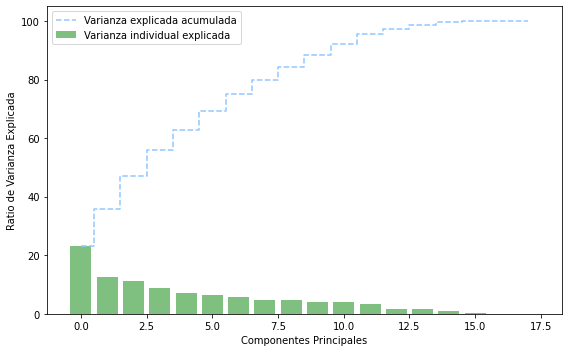

In [ ]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(8, 5))

    plt.bar(range(18), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(18), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
# Escogemos 7 PCAs, representando un poco más del 70% de la variabilidad del modelo

In [ ]:

#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(18,1),
                      eig_pairs[1][1].reshape(18,1),
                      eig_pairs[2][1].reshape(18,1),
                      eig_pairs[3][1].reshape(18,1),
                      eig_pairs[4][1].reshape(18,1),
                      eig_pairs[5][1].reshape(18,1),
                      eig_pairs[6][1].reshape(18,1),
                      ))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[ 3.11399802e-01  1.72469152e-01  1.06637030e-01 -5.14621426e-01
   7.91759698e-02  1.61893829e-02  1.88224115e-01]
 [ 9.92613084e-02 -1.48914258e-01 -2.46068675e-01 -5.88590204e-02
  -2.06979434e-01  1.36905483e-01 -5.18163532e-01]
 [-4.27802995e-02 -1.15847370e-01 -8.96159053e-02 -3.11977902e-01
   5.09736113e-01 -1.34992121e-01 -4.06766152e-01]
 [ 3.11399802e-01  1.72469152e-01  1.06637030e-01 -5.14621426e-01
   7.91759698e-02  1.61893829e-02  1.88224115e-01]
 [-2.16078641e-01 -1.64598730e-01 -2.16200076e-01  1.54216339e-01
   1.01517990e-01  1.36514380e-01  3.87938826e-01]
 [-1.50321664e-01 -1.87408535e-01 -1.42454338e-01  4.39476213e-03
   3.31991683e-01  5.27441415e-02  4.40993558e-01]
 [ 7.17264384e-02  2.51691868e-01 -1.91302693e-01 -2.82671010e-02
  -6.60251864e-02  5.41603521e-01  4.96487093e-02]
 [-1.30222735e-01 -2.97382326e-01 -4.08796550e-01 -2.34841235e-01
  -1.02051557e-01  1.25610453e-02  8.53303602e-02]
 [-1.31625322e-01 -2.74642203e-01 -3.81461815e-01 -3.

In [ ]:
Y.shape

(6795, 7)

In [ ]:
pca_datos = Y

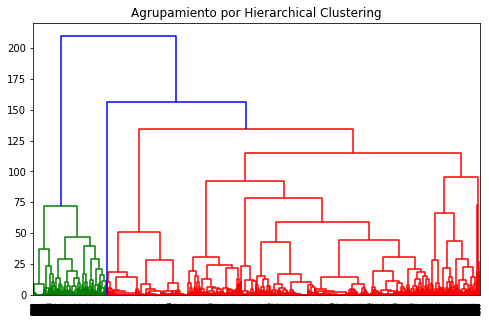

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Agrupamiento por Hierarchical Clustering")
dend = shc.dendrogram(shc.linkage(pca_datos, method='ward',))

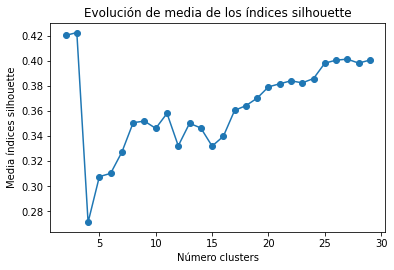

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 30)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(pca_datos)
    silhouette_avg = silhouette_score(pca_datos, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

## Hierarchical Clustering

In [ ]:
data_gov = pca_datos #pd.read_csv('/content/drive/MyDrive/datasets/AprendizajeAutomatico/Proyecto/cesarsecop1.csv',sep=',')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_gov.shape

(6795, 7)

In [ ]:
data_gov = pd.DataFrame(data=data_gov, index=None, columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7"])

In [ ]:
data_gov.isnull().sum()

pca1    0
pca2    0
pca3    0
pca4    0
pca5    0
pca6    0
pca7    0
dtype: int64

In [ ]:
#indices = [26,376,392,500,607,875,1010,1432,2865,3001,3055]

#muestras = data_gov(data_gov.loc[indices]).reset_index(drop=True)   #no funciona!!!!

In [ ]:
muestras = data_gov.sample(frac=0.2,axis=0)

In [ ]:
muestras.shape

(1359, 7)

from sklearn import 

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 1
Muestra 3 se encuentra en el clúster: 0
Muestra 4 se encuentra en el clúster: 2
Muestra 5 se encuentra en el clúster: 0
Muestra 6 se encuentra en el clúster: 2
Muestra 7 se encuentra en el clúster: 0
Muestra 8 se encuentra en el clúster: 2
Muestra 9 se encuentra en el clúster: 0
Muestra 10 se encuentra en el clúster: 1
Muestra 11 se encuentra en el clúster: 1
Muestra 12 se encuentra en el clúster: 0
Muestra 13 se encuentra en el clúster: 1
Muestra 14 se encuentra en el clúster: 0
Muestra 15 se encuentra en el clúster: 0
Muestra 16 se encuentra en el clúster: 0
Muestra 17 se encuentra en el clúster: 0
Muestra 18 se encuentra en el clúster: 1
Muestra 19 se encuentra en el clúster: 2
Muestra 20 se encuentra en el clúster: 0
Muestra 21 se encuentra en el clúster: 0
Muestra 22 se encuentra en el clúster: 0
Muestra 23 se encuentra en el clúster: 0
Muestra 24 se encuentra en

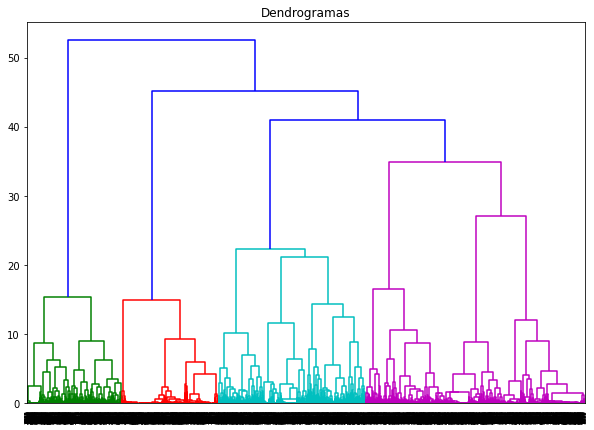

In [ ]:
from sklearn import preprocessing
data_escalada= preprocessing.Normalizer().fit_transform(data_gov)
muestra_escalada= preprocessing.Normalizer().fit_transform(muestras)
X=data_escalada
import scipy.cluster.hierarchy as shc
plt.figure(figsize=[10,7])
plt.title("Dendrogramas")
dendrograma=shc.dendrogram(shc.linkage(X, method='ward'))
from sklearn.cluster import AgglomerativeClustering
algoritmo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)
muestra_prediccion = algoritmo.fit_predict(muestra_escalada)
for i,pred in enumerate(muestra_prediccion):
  print("Muestra", i, "se encuentra en el clúster:",pred)

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

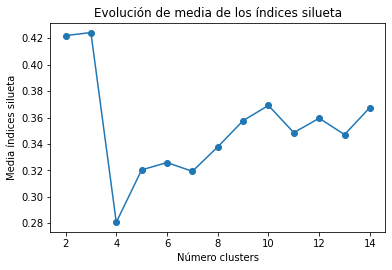

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = KMeans(
                    init   = 'k-means++',
                    algorithm    = 'full',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(data_gov)
    silhouette_avg = silhouette_score(data_gov, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silueta")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silueta');

In [ ]:
modelo_escogido = KMeans(
                    init   = 'k-means++',
                    algorithm    = 'full',
                    n_clusters = 3
             )

In [ ]:
data_gov["cluster_id"] = modelo_escogido.fit_predict(data_gov)

In [ ]:
data_gov

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,cluster_id
0,-0.369722,0.365498,0.591755,-0.084647,0.349247,0.040813,1.152509,1
1,-0.845930,-0.045452,0.432564,0.586857,1.062280,-0.222770,0.140263,1
2,-0.049432,0.636616,0.914809,-0.268222,0.081374,-0.146170,0.498814,1
3,2.321288,-2.486425,-1.870043,3.079247,-0.558925,0.173219,-1.833882,0
4,-1.233038,0.593072,0.717849,-0.722431,-0.004069,-0.115548,0.334740,1
...,...,...,...,...,...,...,...,...
6790,1.668530,1.040303,1.237831,-1.867068,0.748968,-0.197400,1.037750,1
6791,-1.353094,-1.123207,-1.067673,-0.520833,0.797831,-0.230127,0.406634,1
6792,4.976332,0.091409,0.838601,-0.449343,0.859673,-0.346691,0.485818,0
6793,6.564920,0.412589,0.424542,-2.306121,-1.388456,-0.344564,-3.089190,0


In [ ]:
import plotly.express as px
fig = px.scatter_matrix(data_gov,
    dimensions=["pca1","pca2", "pca3","pca4","pca5","pca6","pca7" ],
    color="cluster_id")
fig.show()

 ## DBSCAN

In [ ]:
data_gov.drop(columns=["cluster_id"],axis=1,inplace=True)

In [ ]:
data_gov.shape

(6795, 7)

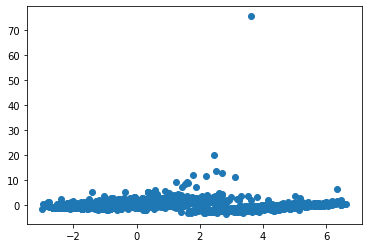

In [ ]:
plt.scatter(pca_datos[:,0],pca_datos[:,1],)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(pca_datos[:,0:2])

In [ ]:
display(clustering_labels)

array([0, 0, 0, ..., 1, 1, 0])

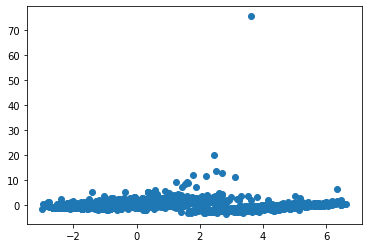

In [ ]:
plt.scatter(pca_datos[:,0],pca_datos[:,1],)

In [ ]:
clustering_labels.max()

3

In [ ]:
clustering_labels = clustering_labels.astype(str)

In [ ]:
px.scatter(x=pca_datos[:,0], y=pca_datos[:,1],color=clustering_labels)

In [ ]:
#df_pca.to_csv("/content/drive/MyDrive/datasets/AprendizajeAutomatico/Proyecto/pca_cesar.csv",index=False,header=True)#

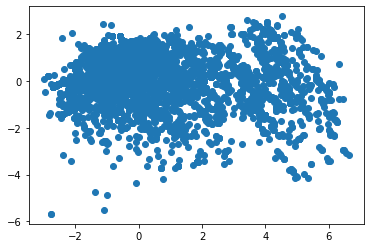

In [ ]:
plt.scatter(pca_datos[:,0],pca_datos[:,6],)

In [ ]:
clustering_labels = DBSCAN(eps=0.2, min_samples=5, metric='l1').fit_predict(pca_datos[:,[0,6]])

In [ ]:
clustering_labels = clustering_labels.astype(str)

In [ ]:
px.scatter(x=pca_datos[:,0], y=pca_datos[:,6],color=clustering_labels)